In [3]:
import sys
import logging
import seaborn as sns
sys.path.append("../")
from experiments.scms import impossible_for_contextual_bo as environ
from experiments.pomps_experiment import POMPSExperiment, MixedPolicyScope, CoBOExperiment
from experiments.causal_bo_experiment import CaBOExperiment, OptimizationObjective
import pandas as pd
import networkx as nx
import numpy as np

In [ ]:
smoke_test = False
n_iter = 300
experiment_name = 'test_cobo_imp'

exp = POMPSExperiment(environ.fcm, {"X1", "X2"}, {"C"}, environ.domain, "Y", [MixedPolicyScope(set())],
                          n_iter=16 if smoke_test else n_iter, experiment_name=experiment_name, debug=True)
# exp = CoBOExperiment(environ.fcm, {"X1", "X2"}, {"C"},
#                          environ.domain, "Y", [MixedPolicyScope(set())], debug=smoke_test,
#                          n_iter=16 if smoke_test else n_iter, experiment_name=experiment_name)
# exp = CaBOExperiment(environ.fcm, {"C", "U1", "U2"},
#                          environ.domain, "Y", n_iter=16 if smoke_test else n_iter,
#                          experiment_name=experiment_name, objetive=OptimizationObjective.minimize)
exp.iterate({"smoke_test": smoke_test, "seed": 42}, smoke_test=True)

  0%|          | 0/300 [00:00<?, ?it/s]

("Policy for {'X2'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.6325), 'X1': tensor(-0.6325), 'X2': -2.0, 'Y': tensor(-0.8941)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(0.8569), 'X1': -1.0, 'X2': tensor(-0.2298), 'Y': tensor(0.0625)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(0.1256), 'X1': 0.0, 'X2': tensor(0.0595), 'Y': tensor(0.0049)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.8417), 'X1': 0.5, 'X2': tensor(0.6513), 'Y': tensor(0.4683)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(0.3021), 'X1': -0.9977232546551973, 'X2': tensor(-0.5495), 'Y': tensor(0.4928)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(0.4234), 'X1': -0.4394227206688354, 'X2': tensor(0.6704), 'Y': tensor(0.4537)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(0.5638), 'X1': -0.9364538710468098, 'X2': tens

("Sample is {'C': tensor(-0.4868), 'X1': -0.4918375839716711, 'X2': tensor(-0.0945), 'Y': tensor(0.0184)}",)
("Policy for {'X2'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.3735), 'X1': tensor(0.3735), 'X2': 0.15924988796616546, 'Y': tensor(-0.0715)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.3692), 'X1': 0.4990715782436029, 'X2': tensor(-0.8297), 'Y': tensor(0.6964)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.3460), 'X1': -0.5302497809996694, 'X2': tensor(0.0352), 'Y': tensor(-0.0008)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.0715), 'X1': -0.40704081438653017, 'X2': tensor(0.6950), 'Y': tensor(0.6066)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(0.8972), 'X1': -0.4753504793048582, 'X2': tensor(-0.5735), 'Y': tensor(0.4020)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(0.4888), 'X1': -0.408389355295

("Sample is {'C': tensor(0.6798), 'X1': -0.9397477432583132, 'X2': tensor(-0.9270), 'Y': tensor(0.9263)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(0.2039), 'X1': 0.18426284307050184, 'X2': tensor(0.5574), 'Y': tensor(0.3633)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.1977), 'X1': -0.9431393516617687, 'X2': tensor(-0.1110), 'Y': tensor(0.0433)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.5277), 'X1': -0.9881735106897247, 'X2': tensor(0.0037), 'Y': tensor(-0.0051)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.3908), 'X1': -0.9790323184395947, 'X2': tensor(-0.0175), 'Y': tensor(-0.0019)}",)
("Policy for {'X1'}, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.7437), 'X1': -0.9287968345909301, 'X2': tensor(-0.0054), 'Y': tensor(-0.0070)}",)
("Policy for {'X2'}, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.3281), 'X1': tensor(0.3281

In [26]:
df = pd.DataFrame(exp._results_store).reset_index()
df = df.sort_values("index")
df['EXP_ID'] = 0
df['Regret'] = 1/3-df['Y']
df['Cum_Regret'] = df['Regret'].cumsum()

<AxesSubplot:xlabel='C', ylabel='X1'>

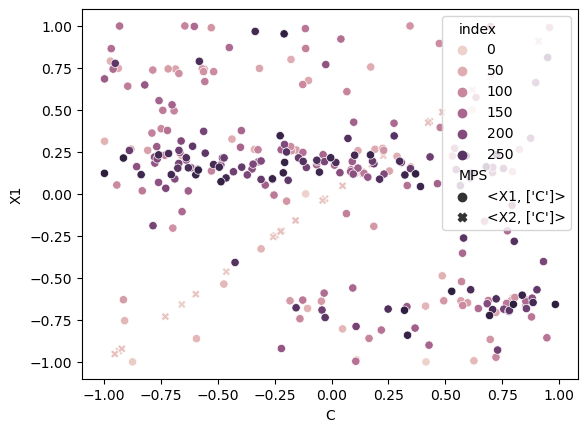

In [31]:
sns.scatterplot(data=df, x='C', y='X1', hue='index', style='MPS')

<AxesSubplot:ylabel='MPS'>

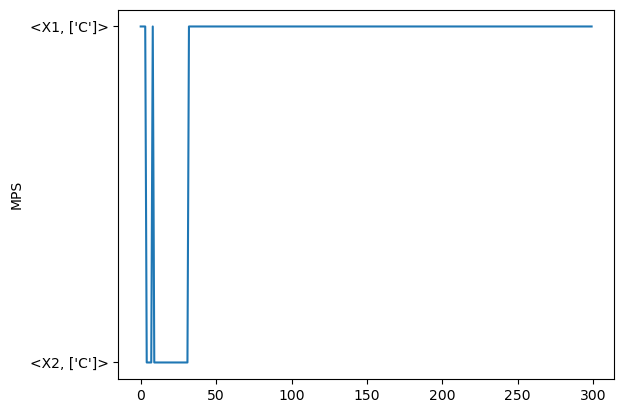

In [27]:
sns.lineplot(df.MPS)

<AxesSubplot:>

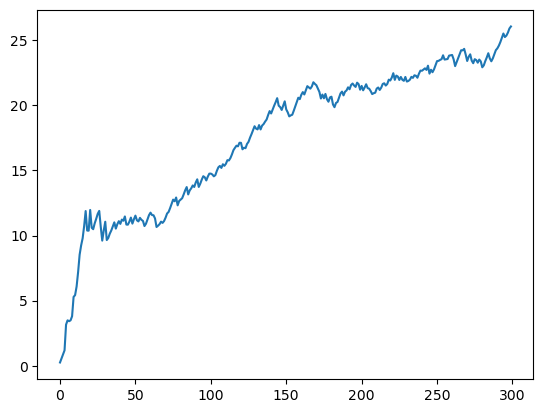

In [28]:
df.Cum_Regret.plot()

In [25]:
exp.

SyntaxError: invalid syntax (1779861486.py, line 1)